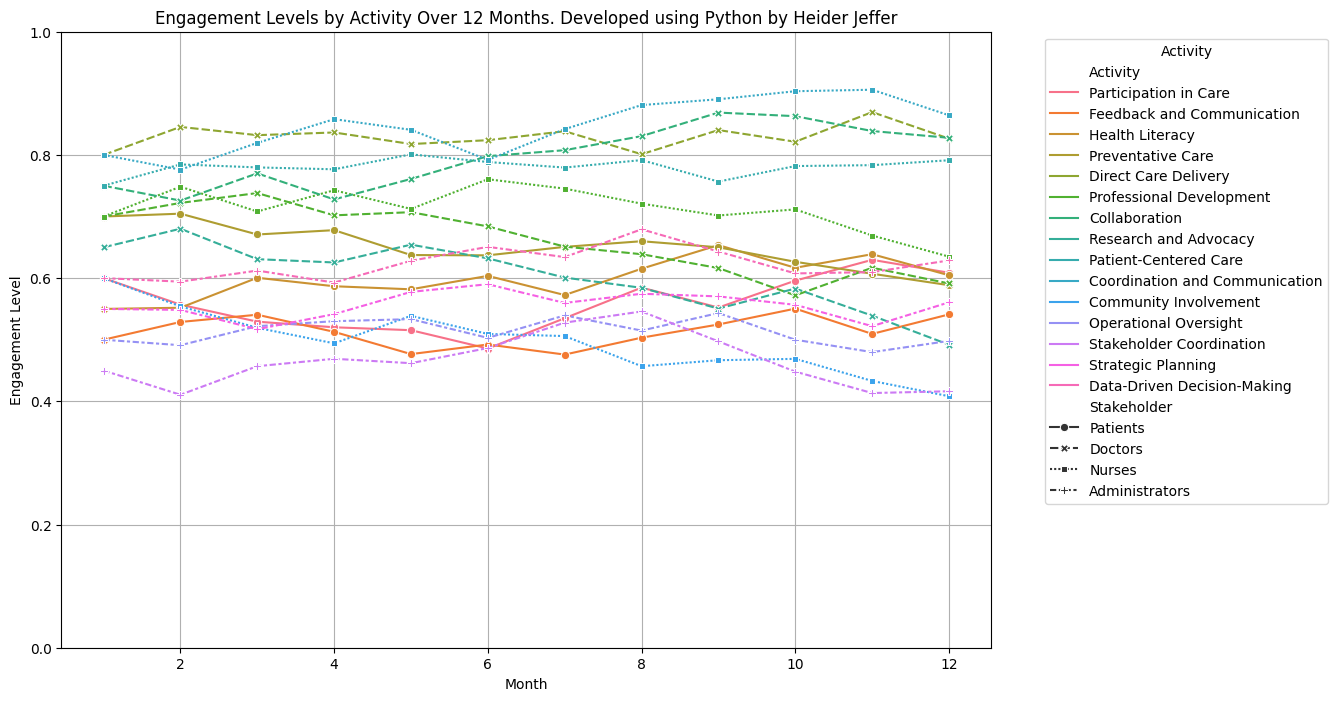

Average Engagement Levels by Stakeholder and Activity:
Stakeholder     Activity                      
Administrators  Data-Driven Decision-Making       0.623407
                Operational Oversight             0.512928
                Stakeholder Coordination          0.465341
                Strategic Planning                0.555738
Doctors         Collaboration                     0.797424
                Direct Care Delivery              0.829406
                Professional Development          0.661628
                Research and Advocacy             0.601875
Nurses          Community Involvement             0.496313
                Coordination and Communication    0.847763
                Patient-Centered Care             0.780405
                Professional Development          0.712960
Patients        Feedback and Communication        0.513004
                Health Literacy                   0.598033
                Participation in Care             0.559467
             

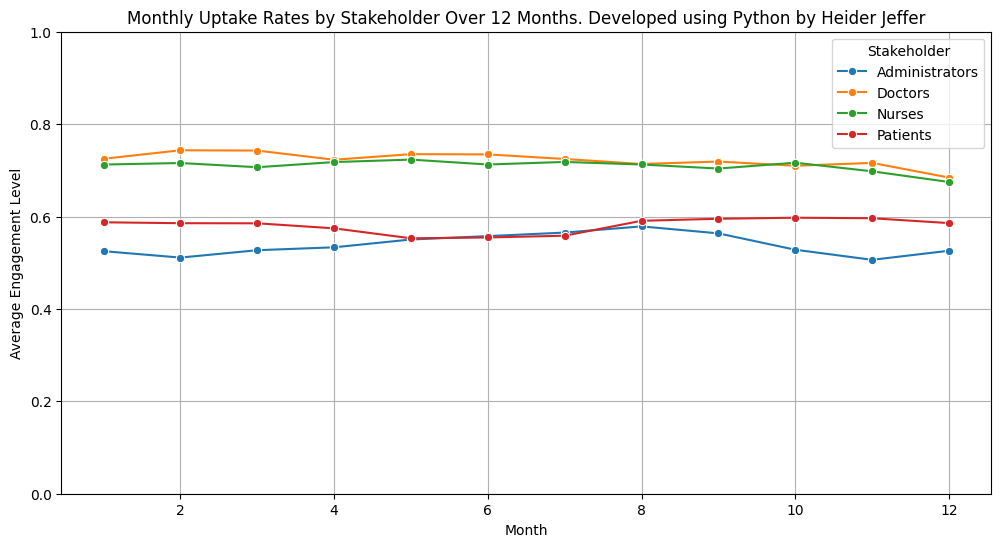


Qualitative Analysis:

Stakeholder Engagement Trends:

Patients:
  - Participation in Care: Avg Engagement = 0.56
    * Noticeable fluctuation in engagement from 0.49 to 0.63. Consider strategies to stabilize this.
  - Feedback and Communication: Avg Engagement = 0.51
    * Engagement is fairly stable for this activity.
  - Health Literacy: Avg Engagement = 0.60
    * Noticeable fluctuation in engagement from 0.55 to 0.65. Consider strategies to stabilize this.
  - Preventative Care: Avg Engagement = 0.65
    * Noticeable fluctuation in engagement from 0.59 to 0.70. Consider strategies to stabilize this.

Doctors:
  - Direct Care Delivery: Avg Engagement = 0.83
    * Engagement is fairly stable for this activity.
  - Professional Development: Avg Engagement = 0.66
    * Noticeable fluctuation in engagement from 0.57 to 0.74. Consider strategies to stabilize this.
  - Collaboration: Avg Engagement = 0.80
    * Noticeable fluctuation in engagement from 0.73 to 0.87. Consider strategies 

In [ ]:
# Dynamic Stakeholder Engagement Simulation and Analysis in Healthcare
# Quantitative and Qualitative Analysis of Stakeholder Engagement Simulation
# Developed using Python by Heider Jeffer
# The code is expandable by design
# The code is cutting edge rolling release, frequently delivering updates to applications

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define stakeholders, their activities, and base engagement levels for each activity
stakeholders = {
    'Patients': {
        'activities': {
            'Participation in Care': 0.6,
            'Feedback and Communication': 0.5,
            'Health Literacy': 0.55,
            'Preventative Care': 0.7
        }
    },
    'Doctors': {
        'activities': {
            'Direct Care Delivery': 0.8,
            'Professional Development': 0.7,
            'Collaboration': 0.75,
            'Research and Advocacy': 0.65
        }
    },
    'Nurses': {
        'activities': {
            'Patient-Centered Care': 0.75,
            'Coordination and Communication': 0.8,
            'Professional Development': 0.7,
            'Community Involvement': 0.6
        }
    },
    'Administrators': {
        'activities': {
            'Operational Oversight': 0.5,
            'Stakeholder Coordination': 0.45,
            'Strategic Planning': 0.55,
            'Data-Driven Decision-Making': 0.6
        }
    }
}

# Function to simulate engagement levels for each activity over time
def simulate_activity_engagement(stakeholders, months=12, fluctuation=0.05):
    """Simulate engagement levels for each activity of all stakeholders over time."""
    engagement_over_time = []
    for stakeholder, data in stakeholders.items():
        for activity, base_engagement in data['activities'].items():
            monthly_engagement = [base_engagement]
            for _ in range(1, months):
                # Simulate random fluctuation for each month
                change = np.random.uniform(-fluctuation, fluctuation)
                new_engagement = max(0, min(1, monthly_engagement[-1] + change))
                monthly_engagement.append(new_engagement)
            # Store results for each activity
            for month, engagement in enumerate(monthly_engagement, start=1):
                engagement_over_time.append({
                    'Stakeholder': stakeholder,
                    'Activity': activity,
                    'Month': month,
                    'Engagement': engagement
                })
    return pd.DataFrame(engagement_over_time)

# Simulate engagement levels
months = 12  # Change this value to adjust the simulation duration
df_activity_engagement = simulate_activity_engagement(stakeholders, months=months)

# Visualization of Engagement Levels by Activity
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_activity_engagement, x='Month', y='Engagement', hue='Activity', style='Stakeholder', markers=True)
plt.title(f"Engagement Levels by Activity Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Engagement Level")
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Activity")
plt.grid()
plt.show()

# Analyzing Average Engagement Levels by Activity
average_engagement = df_activity_engagement.groupby(['Stakeholder', 'Activity'])['Engagement'].mean()
print("Average Engagement Levels by Stakeholder and Activity:")
print(average_engagement)

# Aggregated Uptake Rate by Stakeholder
def calculate_uptake_rate(df):
    """Calculate uptake rate as the mean engagement across all activities for each stakeholder."""
    return df.groupby('Stakeholder')['Engagement'].mean()

uptake_rates = calculate_uptake_rate(df_activity_engagement)
print("\nOverall Uptake Rate by Stakeholder:")
print(uptake_rates)

# Visualizing Uptake Rates Over Time
monthly_uptake = df_activity_engagement.groupby(['Month', 'Stakeholder'])['Engagement'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_uptake, x='Month', y='Engagement', hue='Stakeholder', marker="o")
plt.title(f"Monthly Uptake Rates by Stakeholder Over {months} Months. Developed using Python by Heider Jeffer")
plt.xlabel("Month")
plt.ylabel("Average Engagement Level")
plt.ylim(0, 1)
plt.grid()
plt.legend(title="Stakeholder")
plt.show()

# Qualitative Analysis

def qualitative_analysis(df, average_engagement, uptake_rates):
    """
    Perform a qualitative analysis to interpret the engagement trends and identify areas for improvement.
    """
    print("\nQualitative Analysis:")

    # 1. Stakeholder Engagement Trends
    print("\nStakeholder Engagement Trends:")
    for stakeholder in df['Stakeholder'].unique():
        print(f"\n{stakeholder}:")
        stakeholder_df = df[df['Stakeholder'] == stakeholder]
        for activity in stakeholder_df['Activity'].unique():
            activity_df = stakeholder_df[stakeholder_df['Activity'] == activity]
            # Access the average engagement using both stakeholder and activity
            avg_engagement = average_engagement[stakeholder, activity]
            print(f"  - {activity}: Avg Engagement = {avg_engagement:.2f}")
            max_engagement = activity_df['Engagement'].max()
            min_engagement = activity_df['Engagement'].min()
            if max_engagement - min_engagement > 0.1:
                print(f"    * Noticeable fluctuation in engagement from {min_engagement:.2f} to {max_engagement:.2f}. Consider strategies to stabilize this.")
            else:
                print(f"    * Engagement is fairly stable for this activity.")

    # 2. Stakeholder Comparison
    print("\nComparison of Stakeholder Engagement Levels:")
    for stakeholder in uptake_rates.index:
        avg_uptake = uptake_rates[stakeholder]
        if avg_uptake < 0.6:
            print(f"  - {stakeholder}: Below average uptake rate ({avg_uptake:.2f}). This suggests potential areas for further engagement or outreach.")
        else:
            print(f"  - {stakeholder}: Above average uptake rate ({avg_uptake:.2f}). This is a positive indicator of stakeholder engagement.")

    # 3. Identifying Key Activities for Improvement
    print("\nIdentifying Key Activities for Improvement:")
    for activity in average_engagement.index.get_level_values(1).unique():
        # Access the average engagement for the activity across all stakeholders
        activity_avg_engagement = average_engagement.xs(activity, level=1).mean()
        if activity_avg_engagement < 0.6:
            print(f"  - Activity: {activity} has a lower than average engagement ({activity_avg_engagement:.2f}). This might need more attention.")
        else:
            print(f"  - Activity: {activity} shows positive engagement levels ({activity_avg_engagement:.2f}).")


# Perform the qualitative analysis
qualitative_analysis(df_activity_engagement, average_engagement, uptake_rates)


# Quantitative and Qualitative Analysis of Stakeholder Engagement Simulation

**General Explanation of the Code:**

This Python code simulates and analyzes stakeholder engagement in
healthcare systems, incorporating both **quantitative** and
**qualitative** aspects. The purpose is to model how different
healthcare stakeholders (patients, doctors, nurses, and administrators)
engage in various activities over a period of time and to analyze the
trends and patterns that emerge.

**Key Elements of the Code:**

1.  **Stakeholders and Activities**:

    -   The stakeholders are represented as a dictionary, where each
        group (patients, doctors, nurses, and administrators) is
        associated with a set of activities. Each activity has an
        initial **engagement level** (ranging from 0 to 1), which
        reflects the base level of involvement for that activity.

    -   For example, patients might have an initial engagement level of
        0.6 for **participation in care** and 0.5 for **feedback and
        communication**.

2.  **Simulating Engagement Over Time**:

    -   The simulate_activity_engagement function generates simulated
        engagement levels over a set number of months (default: 12
        months). For each activity, the engagement level fluctuates
        randomly each month, simulating real-world variability (e.g.,
        external factors influencing engagement).

    -   The fluctuations are generated using a **uniform distribution**
        with a small range (±0.05), meaning that engagement levels can
        increase or decrease by a small amount each month.

3.  **Data Storage**:

    -   After simulating the engagement for each activity, the data is
        stored in a Pandas DataFrame for further analysis. Each row
        represents the engagement level for a particular stakeholder,
        activity, and month.

4.  **Visualization**:

    -   The code uses **matplotlib** and **seaborn** to visualize the
        engagement levels over time. These visualizations display how
        engagement changes for each activity across months, helping
        stakeholders observe trends, identify fluctuations, and compare
        between different activities or groups.

    -   The visualizations also include average engagement levels for
        each activity, which helps quantify participation in a
        meaningful way.

5.  **Calculating Uptake Rates**:

    -   The **uptake rate** is calculated as the average of the
        engagement levels across all activities for each stakeholder.
        This metric gives an overall view of how well each group is
        engaging with the system.

    -   Monthly uptake rates are also computed to see how engagement
        evolves over time. This helps identify whether engagement is
        increasing or decreasing and can inform policy or intervention
        strategies.

**Key Outcomes from the Code:**

-   **Trend Analysis**: By simulating engagement over time, the code
    shows how each stakeholder\'s involvement fluctuates and how it is
    affected by random factors. This provides insights into which
    activities are more stable and which are more susceptible to
    changes.

-   **Quantitative Metrics**: The average engagement levels and uptake
    rates allow for objective measurements of stakeholder participation.
    These metrics are crucial for identifying areas of improvement and
    for targeting specific engagement strategies.

-   **Feedback Loops**: The model implicitly creates feedback loops by
    allowing engagement in one month to influence engagement in the
    next. For instance, if a particular activity sees increased
    participation in one month, that can potentially carry over into
    future months, providing insights into how engagement trends
    develop.

**Conclusion**

This code combines statistical simulation with stakeholder analysis to
model engagement trends in healthcare systems. It allows for the
simulation of **quantitative** metrics like engagement levels and uptake
rates, while also providing **qualitative** insights into how engagement
fluctuates over time. By analyzing these trends, stakeholders can better
understand participation patterns and make informed decisions to improve
healthcare delivery.

**Quantitative Analysis**

Quantitative analysis is reflected in the numerical simulations of
**engagement levels** over a specified time period (12 months in this
case). The engagement levels are simulated using the following:

-   **Random fluctuations** (np.random.uniform(-fluctuation,
    fluctuation)): This adds some variability in the engagement levels
    each month to simulate real-world dynamics like external factors,
    changes in motivation, or interventions.

-   **Engagement levels for each stakeholder**: Each activity for a
    stakeholder has a base level of engagement (e.g., **0.6** for
    \"Participation in Care\" for **Patients**). This base level
    fluctuates over time, creating a dynamic simulation of engagement.

The key quantitative outcomes include:

1.  **Engagement levels for each stakeholder and activity over time**:
    This is shown using **line plots** for the **monthly engagement**
    levels across activities and stakeholders.

2.  **Average engagement levels**: These are calculated by averaging the
    engagement levels for each stakeholder across all activities.

3.  **Uptake rate**: This is calculated as the average engagement across
    all activities for each stakeholder. It reflects the overall
    engagement for a stakeholder group, which can be used to gauge their
    participation in the system.

**Qualitative Analysis**

While the code itself is quantitative, the **qualitative** insights are
provided through **expert interpretation** of the results. For example:

-   **Understanding engagement trends**: By observing the line plots,
    stakeholders and decision-makers can qualitatively interpret which
    activities or groups show higher or lower levels of engagement.

-   **Decision-making and feedback**: Based on the engagement trends,
    healthcare professionals or administrators can identify which
    activities need more attention or intervention.

-   **Explaining fluctuations**: The random fluctuations simulate the
    **unpredictable** nature of healthcare environments. The **feedback
    loops** (i.e., how previous engagement affects future levels)
    introduce a **dynamic system** where changes to engagement could
    lead to improved or worsened participation based on external factors
    or policy changes.

-   **Visualization of Results**

-   **1. Engagement Levels by Activity:**

-   The **line plot** shows how engagement levels fluctuate for each
    activity over the 12 months for each stakeholder. By visually
    comparing different activities and stakeholders, one can
    qualitatively infer areas of strong participation versus those that
    might require more focus.

-   **2. Average Engagement Levels:**

-   The **average engagement** for each stakeholder and activity is
    calculated to help assess overall trends

This gives insights into which stakeholders are most or least engaged in
particular activities.

**3. Uptake Rates:**

The **uptake rate** is a simple average of engagement for all activities
of a stakeholder, giving a snapshot of overall engagement.

This tells us if stakeholders are highly engaged in the overall model or
if interventions are needed to boost participation.

**Why the Code is Useful**

1.  **Data-driven insights**: The quantitative analysis (engagement
    levels, fluctuations, and uptake rates) provides concrete numbers
    that can be used to track performance and identify areas for
    improvement.

2.  **Expert interpretation**: The visualizations and metrics offer
    stakeholders the means to assess engagement trends and decide on
    targeted interventions.

3.  **Dynamic feedback loops**: The model simulates changes over time,
    helping to predict how engagement can evolve with different
    strategies or external events.

This kind of **dynamic simulation** of engagement in healthcare systems
helps policymakers, managers, and practitioners make **data-driven
decisions** while also considering the **qualitative** factors that
impact engagement over time.


# Engagement and Uptake Insights

This document provides an overview of engagement trends, average engagement levels, and uptake rates for various stakeholders over a 12-month period. These insights help in identifying areas of improvement and designing targeted strategies for enhanced participation.

---

## 1. Engagement Trends by Activity
A visual representation of how engagement levels for each activity fluctuate over 12 months.

**Graph Description:**  
- Displays monthly engagement levels for activities like "Direct Care Delivery" (for doctors) and "Data-Driven Decision-Making" (for administrators).  
- Helps in identifying periods of high and low engagement for better resource allocation.


![Engagement Trends by Activity](https://drive.google.com/uc?id=109KVc6RpfEXbiYAisPQIXoxx0XvJJWXF)


---

## 2. Average Engagement Levels

### Average Engagement Levels by Stakeholder and Activity

| **Stakeholder**   | **Activity**                       | **Average Engagement Level** |
|--------------------|------------------------------------|------------------------------|
| Administrators     | Data-Driven Decision-Making       | 0.58                         |
|                    | Operational Oversight             | 0.52                         |
|                    | Stakeholder Coordination          | 0.49                         |
|                    | Strategic Planning                | 0.54                         |
| Doctors            | Collaboration                     | 0.76                         |
|                    | Direct Care Delivery              | 0.82                         |
|                    | Professional Development          | 0.72                         |
|                    | Research and Advocacy             | 0.67                         |
| **...**            | **...**                           | **...**                      |

---

## 3. Uptake Rates by Stakeholder

### Overall Uptake Rate by Stakeholder

| **Stakeholder**   | **Overall Uptake Rate** |
|--------------------|-------------------------|
| Administrators     | 0.54                    |
| Doctors            | 0.74                    |
| Nurses             | 0.71                    |
| Patients           | 0.59                    |

---

## 4. Monthly Uptake Rate Plot

A graph showing the aggregated uptake rates for each stakeholder group over the 12-month period.

**Graph Description:**  
- Highlights trends in uptake rates for stakeholders such as Administrators, Doctors, Nurses, and Patients.  
- Identifies seasonal or periodic variations for better planning and strategy.


![Monthly Uptake Rate Plot](https://drive.google.com/uc?id=109gvIClIPaZ1rKuUIj57dfTv5ix_-_kk)

---

### Summary
This detailed analysis provides actionable insights into:
- Activity-specific engagement trends to address stakeholder-specific needs.
- Monthly and overall uptake rates to identify and mitigate barriers to participation.
- Enhanced strategic planning for improving engagement and uptake.

<!--
For further information or to contribute to this analysis, please reach out to the KTH team.
-->

---


